# Neural Bag-Of-Words Model for Sentiment Analysis

# 1. Dataset

1. We are going to use Movie Review Data set publically available on https://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
2. This gz file contrains two folders. One folder for possitive rveiews and one folder for negatiev reviews

# 2. Data Preparation

## 2.1. Clean Text Data

In [5]:
import nltk
nltk.download('stopwords')
import string
import re

# load doc into memory
def load_doc(filename):
# open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load the document
filename = 'D:/Data/txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

[nltk_data]   Unzipping corpora\stopwords.zip.


## 2.2. Define a Vocabulary

In [7]:
from os import listdir
from collections import Counter
#from nltk.corpus import stopwords
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)

# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('D:/Data/txt_sentoken/pos', vocab)
process_docs('D:/Data/txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


## 2.3. Filter Vocabulary

In [8]:
# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()
# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))
# save tokens to a vocabulary file
save_list(tokens, 'D:/Data/ProcessedData/vocab.txt')

25767


# 3. Bag-Of-Words Representation

## 3.2. Reviews to Lines of Tokens

In [13]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# prepare regex for char filtering
	re_punc = re.compile('[%s]' % re.escape(string.punctuation))
	# remove punctuation from each word
	tokens = [re_punc.sub('', w) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

# load and clean a dataset
def load_clean_dataset(vocab):
	# load documents
	neg = process_docs('D:/Data/txt_sentoken/neg', vocab)
	pos = process_docs('D:/Data/txt_sentoken/pos', vocab)
	docs = neg + pos
	# prepare labels
	labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
	return docs, labels

# load the vocabulary
vocab_filename =  'D:/Data/ProcessedData/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
docs, labels = load_clean_dataset(vocab)
# summarize what we have
print(len(docs), len(labels))


1800 1800


## 3.3 Token Lines to bag-of-Words Vectors

In [18]:
from numpy import array
from keras.preprocessing.text import Tokenizer

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# prepare regex for char filtering
	re_punc = re.compile('[%s]' % re.escape(string.punctuation))
	# remove punctuation from each word
	tokens = [re_punc.sub('', w) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_train):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_train and filename.startswith('cv9'):
			continue
		if not is_train and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
	# load documents
	neg = process_docs('D:/Data/txt_sentoken/neg', vocab, is_train)
	pos = process_docs('D:/Data/txt_sentoken/pos', vocab, is_train)
	docs = neg + pos
	# prepare labels
	labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
	return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# load the vocabulary
vocab_filename = 'D:/Data/ProcessedData/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
print(Xtrain.shape, Xtest.shape)


(1800, 25768) (200, 25768)


# 4. Sentiment Analysis Models

## 4.1. First Sentiment Analysis Model

In [22]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

# define the model
def define_model(n_words):
	# define network
	model = Sequential()
	model.add(Dense(50, input_shape=(n_words,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile network
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# summarize defined model
	model.summary()
	plot_model(model, to_file='model.png', show_shapes=True)
	return model
# define the model
n_words = Xtest.shape[1]
model = define_model(n_words)
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1288450   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/10
57/57 - 1s - loss: 0.6910 - accuracy: 0.5544 - 552ms/epoch - 10ms/step
Epoch 2/10
57/57 - 0s - loss: 0.6785 - accuracy: 0.8356 - 276ms/epoch - 5ms/step
Epoch 3/10
57/57 - 0s - loss: 0.6563 - accuracy: 0.9050 - 296ms/epoch - 5ms/step
Epoch 4/10
57/57 - 0s - loss: 0.6231

## 4.2. Comparing Senetiment Models for Different Word scoring methods
The texts to matrix() function for the Tokenizer in the Keras API provides 4 different
methods for scoring words; they are:
1. binary : Where words are marked as present (1) or absent (0).
2. count:  Where the occurrence count for each word is marked as an integer.
3. tfidf:  Where each word is scored based on their frequency, where words that are common across all documents are penalized.
4. freq:  Where words are scored based on their frequency of occurrence within the document.

We will build models using each of these scoring methods while creatign matrix from tokenizer.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                1288450   
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
1 accuracy: 0.9300000071525574
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                1288450   
                           

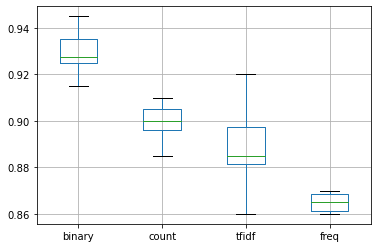

In [23]:
from pandas import DataFrame
from matplotlib import pyplot

# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
	scores = list()
	n_repeats = 10
	n_words = Xtest.shape[1]
	for i in range(n_repeats):
		# define network
		model = define_model(n_words)
		# fit network
		model.fit(Xtrain, ytrain, epochs=10, verbose=0)
		# evaluate
		_, acc = model.evaluate(Xtest, ytest, verbose=0)
		scores.append(acc)
		print('%d accuracy: %s' % ((i+1), acc))
	return scores

# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
	# create the tokenizer
	tokenizer = Tokenizer()
	# fit the tokenizer on the documents
	tokenizer.fit_on_texts(train_docs)
	# encode training data set
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	# encode training data set
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest

# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
	# prepare data for mode
	Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
	# evaluate model on data for mode
	results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()


## 4.3. Prediction on a New text Review
1. Looking at the accuracy distribution box plot, we can see that accuracy is best when we "binary" as scoring method form tokenizer.
2. We will finally train a model using "binary" scoring method and use this model to predict on two sample reviews.

In [30]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
	# clean
	tokens = clean_doc(review)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	# convert to line
	line = ' '.join(tokens)
	# encode
	encoded = tokenizer.texts_to_matrix([line], mode='binary')
	# predict sentiment
	yhat = model.predict(encoded, verbose=0)
	# retrieve predicted percentage and label
	percent_pos = yhat[0,0]

	if round(percent_pos) == 0:
		return (1-percent_pos), 'NEGATIVE'
	return percent_pos, 'POSITIVE'
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')
# define network
n_words = Xtrain.shape[1]
model = define_model(n_words)
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))


Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 50)                1288450   
                                                                 
 dense_85 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/10
57/57 - 1s - loss: 0.4911 - accuracy: 0.7594 - 530ms/epoch - 9ms/step
Epoch 2/10
57/57 - 0s - loss: 0.0677 - accuracy: 0.9939 - 267ms/epoch - 5ms/step
Epoch 3/10
57/57 - 0s - loss: 0.0175 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 4/10
57/57 - 0s - loss: 0.00

# 5. Conclusion
We can see that in sample review this mode is reasonbal to get the right sentiments